---
<p style="text-align: center;font-size: 2em;font-weight: bold;">
Projet numérique de Probabilités 2025/26
</p>

---


# Introduction

On va s'intéresser à la simulation de champs aléatoires gaussiens. On peut définir un champ aléatoire Gaussien comme une collection de variables aléatoires indexées par un ensemble telles que toute combinaison linéaire finie de ces variables aléatoires suit une loi normale. Pour simplifier, nous nous intéresserons à des champs aléatoires gaussiens définis sur une grille régulière de points dans un domaine  $\mathbb{R}^2$. 

Un champ aléatoire Gaussien est entièrement caractérisé par son espérance et sa fonction de covariance. L'espérance est une fonction qui attribue à chaque point du domaine la valeur moyenne de la variable aléatoire associée à ce point. La fonction de covariance est une fonction qui décrit comment les variables aléatoires associées à deux points différents du domaine sont corrélées entre elles. 

Un exemple classique de fonction de covariance est la fonction exponentielle quadratique (ou gaussienne) définie par :
$$C(x, y) = \sigma^2 \exp\left(-\frac{\|x - y\|^2}{a}\right)$$
où  $\sigma^2$ est la variance,  $a$ est le facteur d'échelle, et $\|x - y\|$ est la distance euclidienne entre les points  $x$ et $y$.
Une telle fonction de covariance implique que les points proches dans le domaine ont des valeurs de champ aléatoire fortement corrélées, tandis que les points éloignés ont des valeurs faiblement corrélées. Elle est souvent utilisée pour modéliser des phénomènes naturels où la corrélation diminue avec la distance. 

Dans ce projet, nous allons implémenter une méthode pour simuler des champs aléatoires gaussiens sur une grille régulière de points dans un domaine  $\mathbb{R}^2$. Nous utiliserons dans un premier temps la méthode de la décomposition de Cholesky pour générer des échantillons de champs aléatoires gaussiens à partir de leur fonction de covariance. Dans un second temps, nous explorerons une méthode plus efficace basée sur la représentation spectrale de la fonction de covariance. Enfin, nous verrons comment conditionner ces simulations sur des observations ponctuelles.

# Simulation par la méthode de Cholesky

Quitte à réarranger les points de la grille, on peut supposer que l'on a une liste finie de points  $x_1, x_2, \ldots, x_n$ dans  $\mathbb{R}^2$ où l'on souhaite simuler le champ aléatoire Gaussien. La fonction de covariance  $C$ permet de construire la matrice de covariance  $K$ définie par :

$$K_{ij} = C(x_i, x_j)$$

On va implementer la méthode de Cholesky pour générer des réalisations de champs aléatoires gaussiens à partir de cette matrice de covariance.

1. Ecrire une fonction "covariance_gaussienne" qui prend en entrée une matrice de distances, ainsi que les paramètres  $\sigma^2$ et  $a$, et qui retourne la valeur de la fonction de covariance gaussienne entre ces deux points.

**Question 1 Réponse**

In [ ]:
import numpy as np
from scipy.spatial import distance_matrix
import scipy.spatial as scp
import matplotlib.pyplot as plt

def covariance_gaussienne(matrice_distance, variance, a):
    return variance*np.exp(-matrice_distance**2/a)

np.random.seed(12345)

2. Discrétiser le domaine  $[0, 1] \times [0, 1]$ en une grille régulière de  $n \times n$ points (par exemple,  $n = 50$). Construire la matrice de distances entre tous les points de la grille.

**Question 2 Réponse**

In [ ]:
def discretisation(n):
    M=np.empty((n, n, 2)) # on initialise une grille
    valeurs=np.linspace(0, 1, n, endpoint=True) # on divise le segment [0,1] en n points
    for i in range(n):
        for j in range(n):
            M[i,j]=[valeurs[i], valeurs[j]] # on remplie la grille avec les coordonnées des points
    # on convertit la matrice de coordonées en une liste de n^2 tuples pour correspondre au format de distance_matrix
    LISTE_POINTS=M.reshape(n**2, 2)
    return scp.distance_matrix(LISTE_POINTS, LISTE_POINTS)
    # on obtient une matrice carrée n**2 où DIST[i][j]correspond à la distance le point i et le point j de la liste
    # Par rapport  à la correspondance à M : M[i][j] == LISTE_POINTS[i*n+j]

3. Utiliser la fonction "covariance_gaussienne" pour construire la matrice de covariance $K$ en évaluant la fonction de covariance pour chaque paire de points dans la grille puis calculer la décomposition de Cholesky de $K$ (voir *np.linalg.cholesky*).

On choisira ici  $\sigma^2 = 1$ et  $a = 0.05$.

NB : Pour assurer la stabilité numérique, on peut ajouter un petit terme de régularisation à la diagonale de la matrice de covariance avant de calculer la décomposition de Cholesky (par exemple,  $10^{-10} I$ où  $I$ est la matrice identité).

**Question 3 Réponse**

In [ ]:
sigma2=1.0
a=0.05

def matrice_cov(n,a,sigma2):
    matrice_distance=discretisation(n) # fabrication de la matrice distance
    return covariance_gaussienne(matrice_distance, sigma2, a) # calcul de la covariance

def decompo_Cholesky(matrice):
    matrice=matrice+(np.identity(len(matrice))*10**(-10)) # on applique le conseil pour la stabilité numérique
    return np.linalg.cholesky(matrice) # calcul de la décomposition de Cholesky

4. Générer et représenter une réalisation du champ aléatoire Gaussien centré et de covariance $K$.

**Question 4 Réponse**

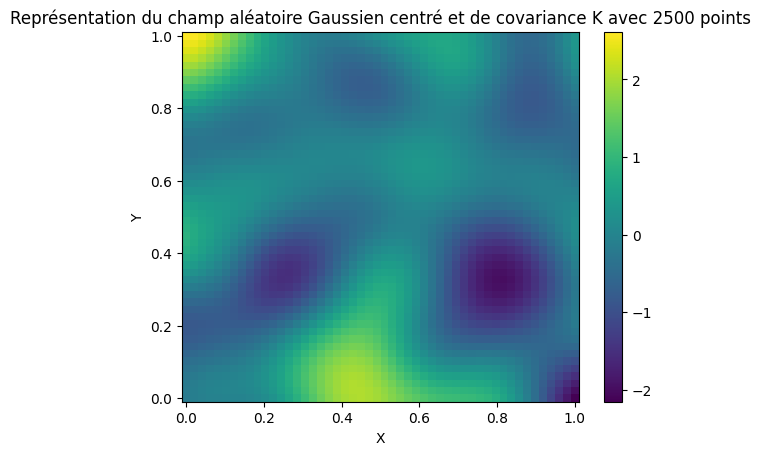

In [ ]:
import matplotlib.pyplot as plt

sigma2=1.0
a=0.05
# On applique la méthode de Cholesky (cf. chapitre V) 
def gauss_K_plot(n):
    matrice=matrice_cov(n, a, sigma2)
    Y=np.random.standard_normal(len(matrice))
    L=decompo_Cholesky(matrice)
    Z=L@Y
    grille=Z.reshape(n,n)
    # Maintenant on gère l'affichage :
    coordonnees=np.linspace(0, 1, n, endpoint=True)
    X,Y=np.meshgrid(coordonnees, coordonnees)
    plt.pcolormesh(X, Y, grille) #shading="gouraud" possible mais on ne voit pas bien la différence de résolution
    plt.colorbar()
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(f"Représentation du champ aléatoire Gaussien centré et de covariance K avec {n**2} points")
    plt.show()
    return
gauss_K_plot(50)


5. Essayer d'augmenter le nombre de pas de discrétisation. Que remarquez-vous ? Expliquer pourquoi.

**Question 5 Réponse**

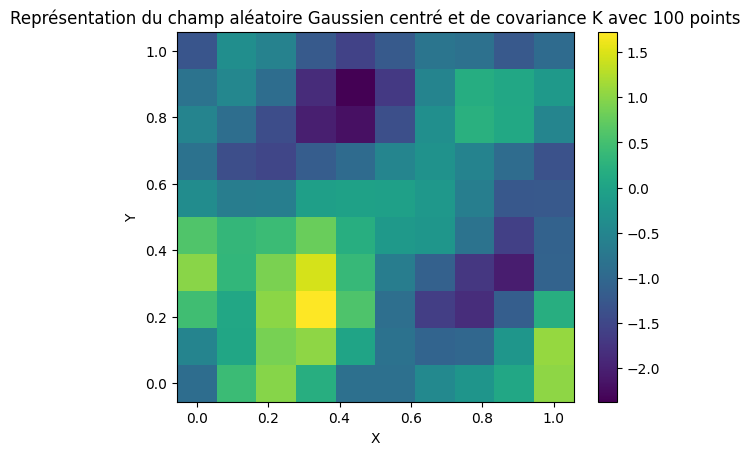

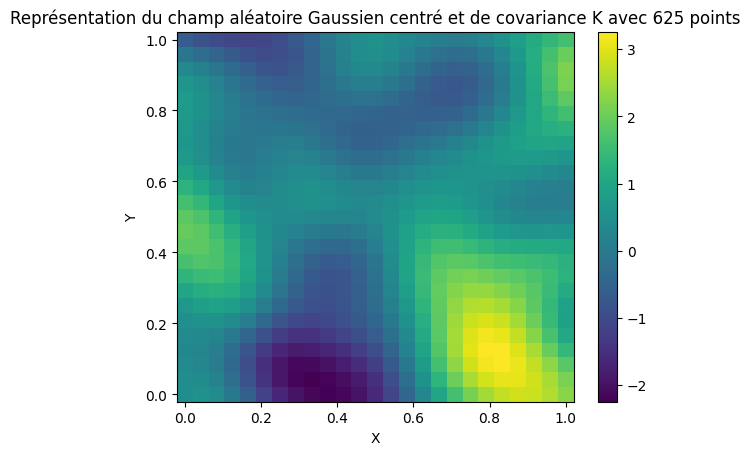

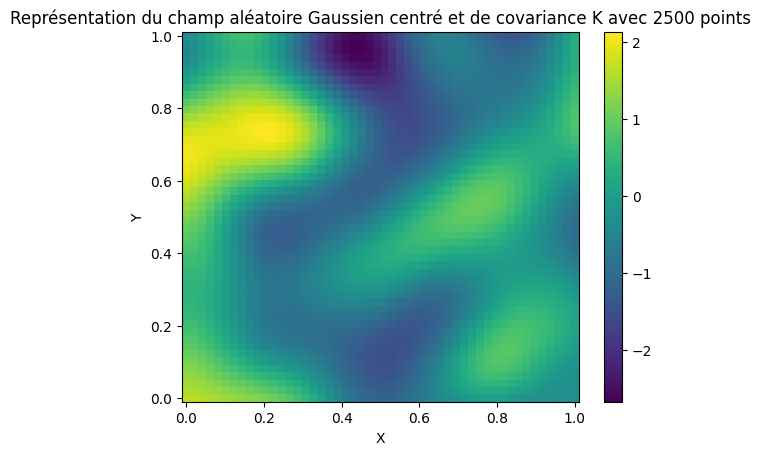

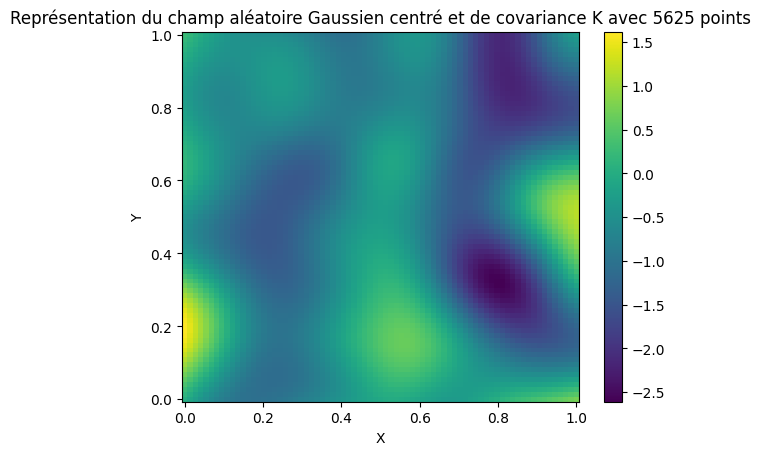

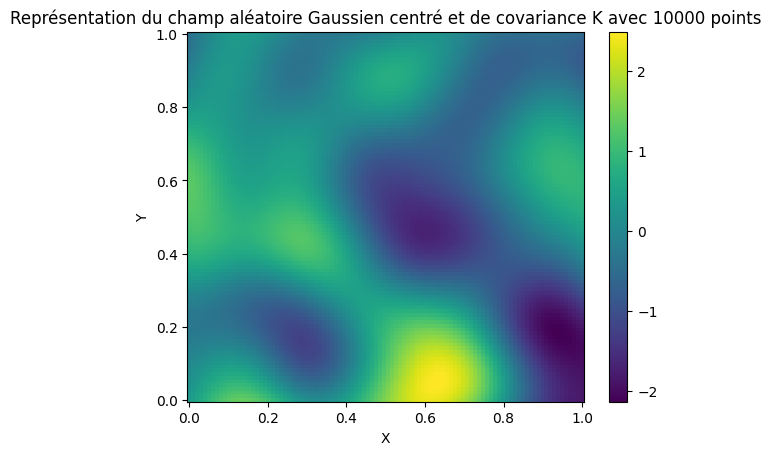

In [ ]:
gauss_K_plot(10)
gauss_K_plot(25)
gauss_K_plot(50)
gauss_K_plot(75)
gauss_K_plot(100)

On remarque que lorsqu'on augmente le nombre n de discrétisation, la résolution de l'image obtenue est meilleure mais, toutefois, le temps de calcul explose. En effet, le pas de discrétisation définit la "taille" des pixels lorsque l'on fait la transformation spatiale $Z=LY$, d'où plus le pas de discrétisation est petit (à savoir n grand) moins l'image sera pixélisée. 

En outre, le temps de calculs explose.En effet lors des différents programmes, notamment dans celui discrétisation, on utilise une matrice $ n^2 * n^2 $. Ainsi en multipliant n par 2 on multiplie le nombre de points par $4$. Comme il y a beaucoup d'étapes de calculs (calcul de la distance pour tous les points, calul de $C(i,j)$ pour la matrice $n^2$, factorisation de Cholesky, représentation graphique, ...), cette  exponentiation ralentit d'autant plus l'efficacité de notre programme.

# Simulation par la méthode spectrale 

Vu les limitations de la méthode de Cholesky pour des grilles fines, nous allons explorer une méthode alternative basée sur la représentation spectrale de la fonction de covariance. 

1. Soit $C(h) = \exp\left(-\frac{\|h\|^2}{a}\right)$, où $h \in \mathbb{R}^2$. Montrer que :
$$ C(h) = \int_{\mathbb{R}^2} \cos(\langle w, h \rangle) \frac{a}{4\pi}\exp\left(-\frac{a\|w\|^2}{4}\right) dw $$

NB: on pourra s'inspirer du calcul de la fonction caractéristique d’un vecteur gaussien en annexe du chapitre IV du cours.

**Question 1 Réponse**

On note la fonction $f$ telle que :$\newline\
f : \mathbb{R^2}\longrightarrow\mathbb{R}\newline
\omega\longrightarrow\ isin(<\omega|h>)\frac{a}{4\pi}\exp\left(-\frac{a\|w\|^2}{4}\right)$. On a déjà que $f$ est intégrable sur $\mathbb{R^2}$ puisque l'exponentielle quadratique l'est.

On a $f(\omega)=-f(-\omega)$ d'où $f$ est impaire et donc son intégrale est nulle sur $\mathbb{R^2}$. D'où, en ajoutant l'intégrale de $f$ au calcul suivant on a :

$I = \int_{\mathbb{R}^2}\cos(<\omega|h>)\frac{a}{4\pi}\exp\left(-\frac{a\|w\|^2}{4}\right)dw = \int_{\mathbb{R}^2}\exp\left(i<w|h>\right)\frac{a}{4\pi}\exp\left(-\frac{a\|w\|^2}{4}\right)dw = \int_{\mathbb{R}^2}\exp\left(i(x_1h_1+x_2h_2)\right)\frac{a}{4\pi}\exp\left(-\frac{a(x_1^2+x_2^2)}{4}\right)dx_1dx_2$

En utilisant le théorème de Fubini pour les fonctions intégrables (car f est intégrable), on obtient : $ \newline I = \frac{a}{4\pi}(\int_{\mathbb{R}}\exp\left(i(xh_1)-a\frac{x^2}{4}\right)dx)(\int_{\mathbb{R}}\exp\left(i(yh_2)-a\frac{y^2}{4}\right)dy) = \frac{a}{4\pi}I_xI_y $

On a : $I_x = \int_{\mathbb{R}}\exp\left(-\frac{a}{4}(x-\frac{2ih_1}{a})^2\right)exp\left(\frac{a}{4}(\frac{2ih_1}{a})^2\right)dx = exp\left(-\frac{h_1^2}{a}\right)\int_{\mathbb{R}}\exp\left(-\frac{a}{4}(x-\frac{2ih_1}{a})^2\right)dx$

On pose $u = \sqrt{\frac{a}{4}}(x-\frac{2ih_1}{a})$ alors $ \frac{2}{\sqrt{a}}du = dx$ et par changement de variable : 

$I_x = exp\left(-\frac{h_1^2}{a}\right)\frac{2}{\sqrt{a}}\int_{\mathbb{R}}\exp\left(-u^2\right)du = 2\sqrt{\frac{\pi}{a}}exp\left(-\frac{h_1^2}{a}\right)$ car $\int_{\mathbb{R}}\exp\left(-u^2\right)du=\sqrt{\pi}$

De même, on obtient : $I_y =2\sqrt{\frac{\pi}{a}} exp\left(-\frac{h_2^2}{a}\right)$

D'où finalement : $ I = \frac{a}{4\pi}(2\sqrt{\frac{\pi}{a}}exp\left(-\frac{h_1^2}{a}\right))(2\sqrt{\frac{\pi}{a}}exp\left(-\frac{h_2^2}{a}\right)) = \exp\left(-\frac{h_1^2+h_2^2}{a}\right) = \exp\left(-\frac{\|h\|^2}{a}\right) = C(h) $


2. Soient $W$ et $\Phi$ deux variables aléatoires indépendantes, de lois respectives $\mathcal{N}(0, \frac{2}{a} I_2)$, avec $I_2$ la matrice identité de dimension 2, et $\mathcal{U}[0, 2\pi[$. Montrer que la variable aléatoire définie en tout point $x \in \mathbb{R}^2$ par :
$$ Z(x) = \sqrt{2} \cos(\langle W, x \rangle + \Phi) $$
est d'espérance nulle et de fonction de covariance $C$.

**Question 2 Réponse**

On note $ Y = (W, \phi)$. On a $f_Y = f_Wf_\phi$ par indépendance. On a pour $x\in\mathbb{R}^2, z\in\mathbb{R}^2$ :

$E(Z(x)) = \int_{\mathbb{R}\times[0, 2\pi[}\sqrt{2} \cos(\langle W, x \rangle + \Phi)f_Y(y)dy = \frac{\sqrt{2}}{2\pi}\int_{\mathbb{R}}(\int_{[0, 2\pi[}\cos(\langle W, x \rangle + \Phi)d\phi)f_W(w)dw = 0$ (avec $y = (w,\phi)$) car l'intégrale du cosinus sur $[0, 2\pi[$ est nulle.

Passons maintenant au calcul de la covariance :

$Cov(Z(x),Z(z)) = E(Z(x)Z(z)) = 2\int_{\mathbb{R}\times[0, 2\pi[}\cos(\langle W, x \rangle + \Phi)\cos(\langle W, z \rangle + \Phi)f_Y(y)dy$ avec $y = (w,\phi)$

$Cov(Z(x),Z(z)) = E(\cos(\langle W, x-z \rangle) + \cos(\langle W, x+z \rangle + 2\Phi))$

$Cov(Z(x),Z(z)) = E(\cos(\langle W, x-z \rangle))$ par linéarité de l'espérance, et car si on pose $\tilde{\phi}\rightarrow2\phi$ lorsque $\phi$ fait un tour du cercle trigonométrique $\tilde{\phi}$ en fait deux et donc annule le cosinus (on peut également faire le calcul brut de l'intégrale et obtenir le même résultat). On a donc puisque $W$ est un vecteur gaussien,

$Cov(Z(x),Z(z)) = \int_{\mathbb{R}^2}\cos(\langle W, x-z \rangle)f_W(w)dw$ avec $f_W(w) = \frac{1}{2\pi\sqrt{(\frac{2}{a})^2}}\exp\left(-\frac{1}{2}\frac{2}{a}\|w\|^2\right) = \frac{a}{4\pi}\exp\left(-\frac{a\|w\|^2}{4}\right)$

D'où : $Cov(Z(x),Z(z)) = C(x-z)$ d'après la question précédente.




3. Soient les suites de variables aléatoires indépendantes $(W_n)_{n \in \mathbb{N}}$ et $(\Phi_n)_{n \in \mathbb{N}}$ telles que $W_n \sim \mathcal{N}(0, \frac{2}{a} I_2)$ et $\Phi_n \sim \mathcal{U}([0, 2\pi])$. Montrer que pour tout ensemble fini de points  $x_1, \ldots, x_n$ dans  $\mathbb{R}^2$ , le vecteur aléatoire $Y = (Y(x_1), \ldots, Y(x_n))$ où :
$$ Y(x_i) = \sqrt{\frac{2}{N}} \sum_{k=1}^{N} \cos(\langle W_k, x_i \rangle + \Phi_k) $$
tend vers un vecteur aléatoire de loi normale multivariée d'espérance nulle et de matrice de covariance $K$ définie par  $K_{ij} = C(x_i - x_j)$.

**Question 3 Réponse**

On note $\forall k \in \mathbb{N}, Z_k(x) = \sqrt{2}\cos(\langle W_k, x \rangle + \Phi_k)$

On pose alors $\forall k \in \mathbb{N}, X_k = (Z_k(x_1), ...,Z_k(x_n))$ qui est un vecteur aléatoire d'espérance $(0, ..., 0)$ et de matrice de covariance $K = (K_{i,j}) = (C(x_i-x_j))$.

Soit $N\in \mathbb{N}$. On pose également : $Y_N(x) = (Y_N(x_1), ..., Y_N(x_n))$.

Or : $Y_N = \frac{1}{\sqrt{N}}\sum_{k=1}^{N}X_k$ , et les $(X_k)$ sont indépendants et de même loi car $(W_n)_{n \in \mathbb{N}}$ et $(\Phi_n)_{n \in \mathbb{N}}$ sont mutuellement indépendantes. D'où d'après le théorême central limite multidimensionnel, $Y_N$ converge en loi lorsque $N$ tend vers $+\infty$ vers $\mathcal{N}(0, K)$.






4. Implémenter une fonction basée sur cette méthode pour simuler un champ aléatoire gaussien sur une grille régulière de points dans le domaine  $[0, 1] \times [0, 1]$. Cette fonction prendra en entrée les coordonnées des points de la grille, $a$ et  $N$ et retournera une réalisation du champ aléatoire gaussien simulé.

**Question 4 Réponse**

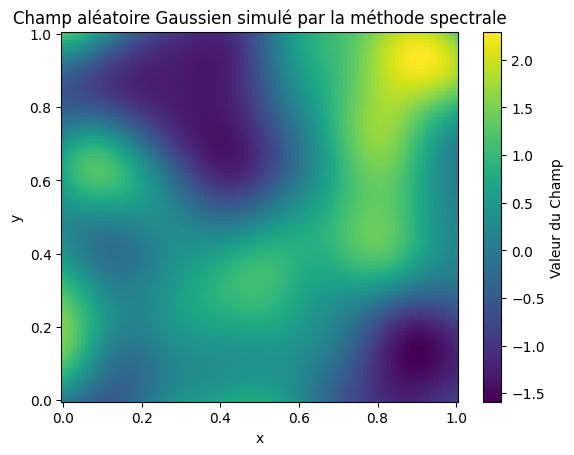

In [ ]:
import numpy as np

def C(h, a):
    return np.exp(-(np.linalg.norm(h))**2/a)

def methode_spectrale(liste_coordonees, a, N):
    n=len(liste_coordonees)
    W=[np.random.standard_normal(2)*np.sqrt(2/a) for _ in range(N)]
    PHI=[np.random.uniform(0, 2*np.pi) for _ in range(N)]
    Y=[] 
    for i in range(n):
        # on calcule la valeur de Y(x_i)
        y=0
        for k in range(N):
            y+=np.sqrt(2/N)*np.cos(np.dot(W[k], liste_coordonees[i])+ PHI[k])
        Y.append(y)
    return Y

a=0.05
N=500
n=100
X=np.linspace(0, 1, n, endpoint=True)
Y=np.linspace(0, 1, n, endpoint=True)
liste_coordonees=np.array([[X[i], Y[j]] for i in range(n) for j in range(n)])
vecteur_gaussien=methode_spectrale(liste_coordonees, a, N)
Z=np.array(vecteur_gaussien).reshape(n, n)
plt.pcolormesh(X, Y, Z)#shading="gouraud"
plt.colorbar(label="Valeur du Champ")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Champ aléatoire Gaussien simulé par la méthode spectrale")
plt.show();

5. Tester cette fonction pour différentes valeurs du nombre de points de discrétisation et de $N$. Proposer un diagnostic permettant de calibrer $N$ afin que les résultats soient conformes aux attentes. Comparer les résultats obtenus avec ceux de la méthode de Cholesky. Quels sont les avantages et les inconvénients de chaque méthode ?

**Question 5 Réponse**

Nous avons codé deux fonctions pour mesurer le temps d'éxécution de la fonction méthode_spectrale en fonction de n (le nombre de discrétisation) et N. Commes ces programmes mettent du temps à tourner, nous avons simplement mis les photos du code et du résultat pour simplifier la lecture.

![](f(n).png)

On observe une complexité en $n^2$ (logique car on utilise une double boucle de taille n pour former la liste des coordonées).

De même pour N :

![](deux.png)

On observe une complexité linéaire.

Il reste donc à trouver un bon compromis entre une approximation plus fidèle du champ aléatoire gaussien (donc un $N$ plutôt élevé) et un temps d'exécution plutôt faible (donc un $N$ plutôt petit). Dans les deux méthodes, la complexité est en $n^2$. A résolution d'image fixé, $n$, la méthode Cholesky donne un champ gaussien centré alors que la méthode spectrale ne donne qu'une approximation de ce champ (le champ gaussien est le cas où $N$ tend vers $\inf$ ce qui ferait augmenter considérablement le temps de calcul). Cependant, la méthode de Cholesky passe par le calcul de matrice de distance et de covariance (de taille $n^2xn^2$), ce qui est très coûteux en temps d'exécution, tandis que la méthode spectrale ne réalise "que" des sommes de cosinus ($n$ sommes de $N$ termes).

En se contentant d'une simple approximation du champ gaussien (assez fidèle quand même), la méthode spectrale permet donc, à résolution équivalente, un temps d'exécution plus faible. 




# Simulation conditionnelle 

On suppose désormais que l'on dispose de valeurs observées du champ aléatoire Gaussien en certains points du domaine. On souhaite simuler des réalisations conditionnelles du champ aléatoire Gaussien en tenant compte de ces observations. On travaillera désormais avec une grille de taille $100 \times 100$.
Soit $X$ un vecteur aléatoire Gaussien partitionné en deux sous-vecteurs $X_1$ et $X_2$, où $X_1$ représente les points observés et $X_2$ les points non observés. 

1. Rappeler l'expression de la distribution jointe de $X = (X_1, X_2)$ puis de la distribution conditionnelle de $X_2$ sachant $X_1$. Montrer que la différence entre l'espérance conditionnelle et le vecteur des points non observés est un vecteur Gaussien d'espérance nulle indépendant du vecteur des points non observés.

**Question 1 Réponse**

On note $p,q \in \mathbb{N}$ tels que $X_1 \in \mathbb{R}^p$ et $X_2 \in \mathbb{R}^q$ avec $p+q=100^2+n_{obs}=10 000+n_{obs}$. Vu que le vecteur gaussien $X$ est centré (en se plaçant dans le cas des parties précédentes), alors on sait que : $\newline \forall x \in \mathbb{R}^{p+q}, f_X(x)=\frac{1}{(2\pi)^{\frac{p+q}{2}}\sqrt{det(K)}} \exp \left( -\frac{1}{2}x^T K^{-1} x \right) $ avec $K=\begin{pmatrix} K_1 & K_{12} \\ K_{21} & K_2 \end{pmatrix}$ où $K_1=\mathbb{V}(X_1)$, $K_2=\mathbb{V}(X_2)$, $K_{12}=Cov(X_1,X_2)$ et $K_{21}=K_{12}^T$. 

On sait d'après le cours que $f_{X_2|X_1=x_1}(x_2)=\frac{f_X((x_1,x_2))}{f_{X_1}(x_1)}$ qui est une gaussienne telle que $f_{X_2|X_1=x_1}(x_2)=\frac{1}{(2\pi)^{\frac{q}{2}}\sqrt{det(\tilde{K})}} \exp \left( -\frac{1}{2}(x_2 - \mathbb{E}(X_2|X_1=x_1))^T \tilde{K}^{-1} (x_2 - \mathbb{E}(X_2|X_1=x_1) \right)$ avec, d'après le cours et l'utilisation du complément de Schur du bloc $K_2$, $\tilde{K}=K_2-K_{21}K_1^{-1}K_{12}$ et $\mathbb{E}(X_2|X_1)=K_{21}K_1^{-1}X_1$ car $\mathbb{E}(X_1)=0$ et $\mathbb{E}(X_2)=0$. 

On a donc entre autre que $X_2|X_1=x_1$ est un vecteur gaussien mais également que $\mathbb{E}(X_2|X_1)$ est un vecteur aléatoire gaussien. En effet, puisque $X=(X_1,X_2)$ est un vecteur gaussien, alors $X_1$ est un vecteur aléatoire gaussien et puisque $K_{21}K_1^{-1}$ est fixe, $\mathbb{E}(X_2|X_1)$ est une transformation linéaire de $X_1$, donc un vecteur aléatoire gaussien également.

On pose $Z=\mathbb{E}(X_2|X_1)-X_2$. Par linéarité de l'espérance et formule de l'espérance totale, on a $\mathbb{E}(Z)=\mathbb{E}(\mathbb{E}(X_2|X_1))-\mathbb{E}(X_2)=\mathbb{E}(X_2)-\mathbb{E}(X_2)=0$.

De plus, puisque $X$ est un vecteur gaussien, toute combinaison linéaire de ses variables est un vecteur gaussien, d'où $Z=\mathbb{E}(X_2|X_1)-X_2$ est un vecteur gaussien. Or, dans le cas gaussien, on a équivalence entre covariance nulle et indépendance puisqu'on peut factoriser la densité dans le cas de covariance nulle (matrice de covariance diagonale par blocs) et donc montrer que la densité du couple est la densité produit, ce qui est équivalent à l'indépendance. 

On calcule donc $Cov(Z,X_1)$, on a : $\newline Cov(Z,X_1)=\mathbb{E}(ZX_1^T)$ puisque les vecteurs $Z$ et $X_1$ sont centrés. Ainsi, $Cov(Z,X_1)=\mathbb{E}((\mathbb{E}(X_2|X_1)-X_2)X_1^T)=\mathbb{E}((K_{21}K_1^{-1}X_1 - X_2)X_1^T)=K_{21}K_1^{-1}\mathbb{E}(X_1X_1^T)-\mathbb{E}(X_2X_1^T)$. Or, les vecteurs gaussiens $X_1$ et $X_2$ sont centrés donc : $\newline \mathbb{E}(X_2X_1^T)=Cov(X_2,X_1)=K_{21}$ et $\mathbb{E}(X_1X_1^T)=\mathbb{V}(X_1)=K_1$, par définition de $K_{12}$ et $K_1$. D'où $ Cov(Z,X_1)=K_{21}K_1^{-1}K_1-K_{21}=0$. 

Ainsi, on a bien $Z=\mathbb{E}(X_2|X_1)-X_2$ indépendant de $X_1$ d'après les remarques précédentes.

On va donc chercher à simuler directement cette différence pour obtenir des réalisations conditionnelles du champ aléatoire Gaussien.

2. Générer 50 points uniformément répartis dans le domaine  $[0, 1] \times [0, 1]$ et simuler des observations du champ aléatoire Gaussien en ces points.


**Question 2 Réponse**

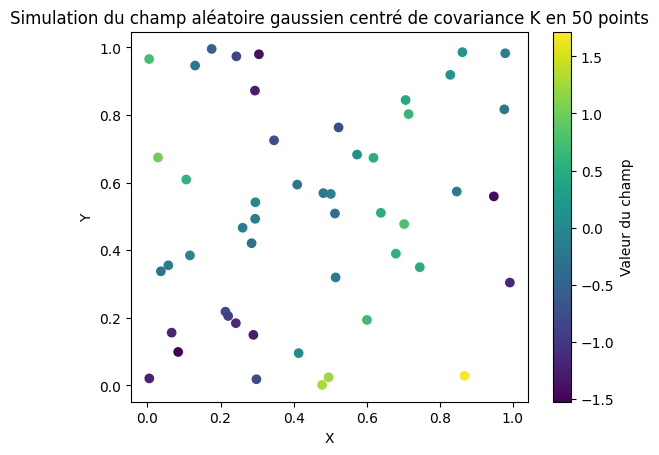

In [ ]:
sigma2=1.0
a=0.05
n_1=50
points_1=np.random.rand(n_1, 2)
distance_1=scp.distance_matrix(points_1,points_1)
K_1=covariance_gaussienne(distance_1,sigma2,a)
Y_1=np.random.standard_normal(len(distance_1))
L=decompo_Cholesky(K_1)
X_1=L@Y_1

plt.scatter(points_1[:, 0], points_1[:, 1], c=X_1, cmap='viridis')
plt.colorbar(label="Valeur du champ")
plt.title("Simulation du champ aléatoire gaussien centré de covariance K en 50 points")
plt.xlabel("X")
plt.ylabel("Y")
plt.show();


3. Calculer l'espérance conditionnelle aux points de la grille et la représenter.

NB : Pour assurer la stabilité numérique, on doit ajouter un terme de régularisation plus important à la diagonale de la matrice de covariance avant de calculer son inverse ($10^{-2} I$ conviendra ici).

**Question 3 Réponse**

On avait $\mathbb{E}(X_2|X_1)=K_{21}K_1^{-1}X_1$. D'où on calcule ici pour $X_1=Valeurs(points_{obs})$.

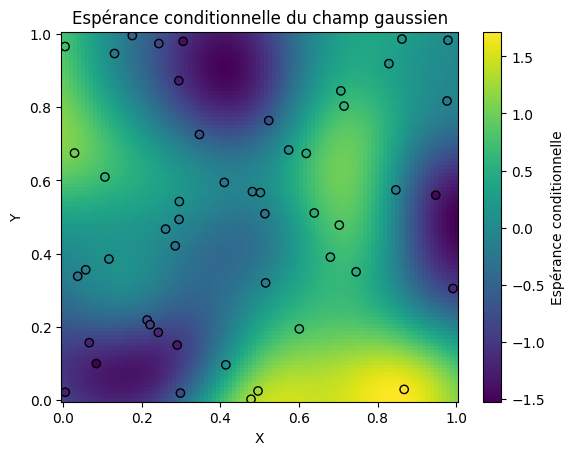

In [ ]:
n_1=50
n_2=100

valeurs=np.linspace(0,1,n_2,endpoint=True)
points_2=np.array([(valeurs[i],valeurs[j]) for i in range(n_2) for j in range(n_2)])
distance_21=scp.distance_matrix(points_2,points_1)
K_21=covariance_gaussienne(distance_21,sigma2,a)

K_1=K_1+np.identity(len(K_1))*10**(-2)
E_211=K_21@np.linalg.solve(K_1, X_1)
E_211=E_211.reshape(n_2,n_2)

plt.pcolormesh(points_2[:,0].reshape(n_2,n_2), points_2[:,1].reshape(n_2,n_2),  E_211, shading="auto", cmap="viridis")
plt.scatter(points_1[:, 0], points_1[:, 1], c=X_1, edgecolors="black", cmap="viridis")
plt.colorbar(label="Espérance conditionnelle")
plt.title("Espérance conditionnelle du champ gaussien")
plt.xlabel("X")
plt.ylabel("Y")
plt.show();


4. Pour générer de manière indépendante la différence entre l'espérance conditionnelle et le vecteur des points non observés, on génère une seconde réalisation du champ aléatoire aux points de la grille **et** aux coordonnées des points observés par la méthode spectrale. On calcule ensuite la différence entre cette réalisation et l'espérance conditionnelle sachant les valeurs simulées aux coordonnées des points observés. Enfin, on additionne cette différence à l'espérance conditionnelle sachant les observations pour obtenir une réalisation conditionnelle du champ aléatoire Gaussien sur la grille. Implémenter cette approche et représenter une réalisation conditionnelle du champ aléatoire Gaussien sur la grille.

**Question 4 Réponse**

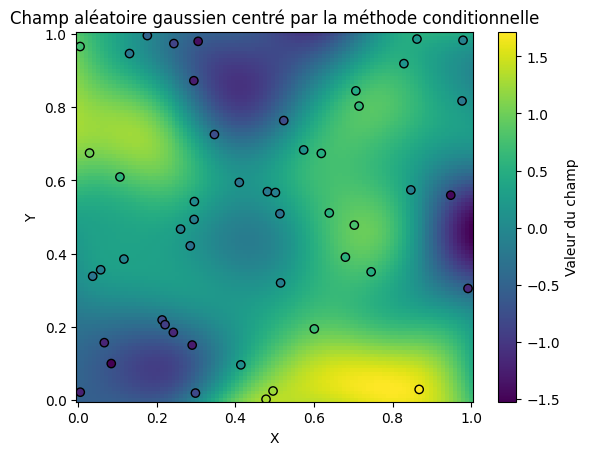

In [ ]:
def simulation_conditionnelle():
    #Rappel méthode spectrale
    def C(h, a):
        return np.exp(-(np.linalg.norm(h))**2/a)
    def methode_spectrale(liste_coordonees, a, N):
        n=len(liste_coordonees)
        W=[np.random.standard_normal(2)*np.sqrt(2/a) for _ in range(N)]
        PHI=[np.random.uniform(0, 2*np.pi) for _ in range(N)]
        Y=[] 
        for i in range(n):
            # on calcule la valeur de Y(x_i)
            y=0
            for k in range(N):
                y+=np.sqrt(2/N)*np.cos(np.dot(W[k], liste_coordonees[i])+ PHI[k])
            Y.append(y)
        return Y
    valeurs=np.linspace(0,1,n_2,endpoint=True)
    points_2=np.array([(valeurs[i],valeurs[j]) for i in range(n_2) for j in range(n_2)])
    points=np.vstack([points_2, points_1])
    distance_21=scp.distance_matrix(points_2,points_1)
    K_21=covariance_gaussienne(distance_21,sigma2,a)
    E_21=K_21@np.linalg.solve(K_1, X_1)
    Champ_tot=methode_spectrale(points,a,N)
    Champ_nonobs=Champ_tot[:-n_1]
    Diff=Champ_nonobs-K_21@np.linalg.solve(K_1, Champ_tot[-n_1:])
    X_2=E_21+Diff 
    return X_2,points_2
sigma2=1.0
a=0.05
n_1=50
n_2=100
n_tot=n_1+n_2
N=100
X_2,points_2=simulation_conditionnelle()
X_2=X_2.reshape(n_2,n_2)
plt.pcolormesh(points_2[:,0].reshape(n_2,n_2), points_2[:,1].reshape(n_2,n_2),  X_2, shading="auto", cmap="viridis")
plt.scatter(points_1[:, 0], points_1[:, 1], c=X_1, edgecolors="black", cmap="viridis")
plt.colorbar(label="Valeur du champ")
plt.title("Champ aléatoire gaussien centré par la méthode conditionnelle")
plt.xlabel("X")
plt.ylabel("Y")
plt.show();

5. Générer 500 simulations conditionnelles et comparer la moyenne empirique de ces simulations avec l'espérance conditionnelle calculée précédemment. Que constate-t-on ? Expliquer pourquoi.

**Question 5 Réponse** 

Cf code ci-dessous pour la partie programmation. Chaque simulation est indépendante les unes des autres puisqu'on retire à chaque fois les $W_k$ et $\Phi_k$ dans la méthode spectrale pour construire le champ totale. Les divergences à la moyenne des $(X_2|X_1)_k$ pour $k \in [1,n]$ sont donc compensées par le moyennage que nous en faisons dans le programme suivant. Mathématiquement, ce résultat repose sur la loi des grands nombres multivarié. 

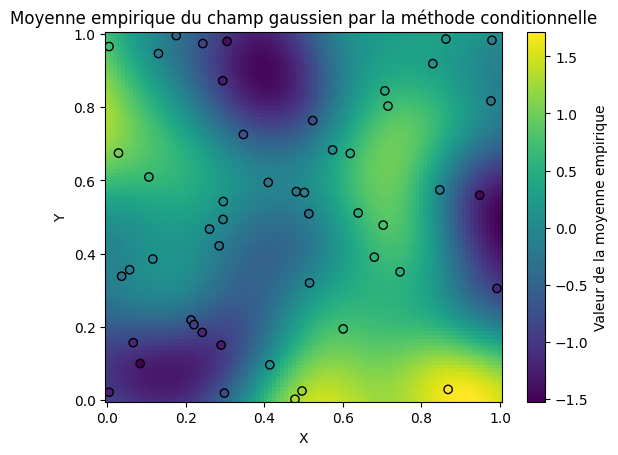

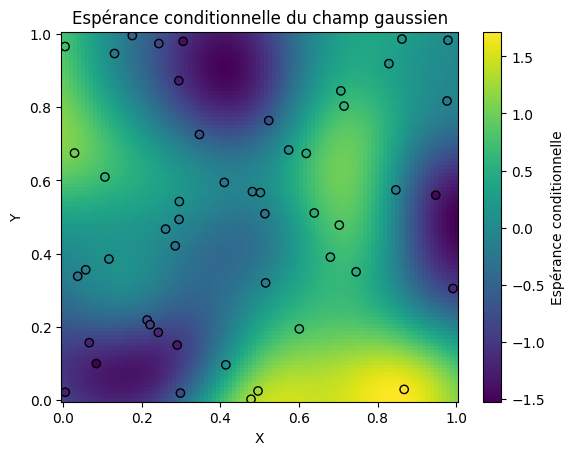

In [ ]:
n=10
Moy=np.zeros(n_2**2)
for i in range (n):
    X_2,l=simulation_conditionnelle()
    Moy+=(1/n)*X_2
Moy=Moy.reshape(n_2,n_2)
plt.pcolormesh(points_2[:,0].reshape(n_2,n_2), points_2[:,1].reshape(n_2,n_2),  Moy, shading="auto", cmap="viridis")
plt.scatter(points_1[:, 0], points_1[:, 1], c=X_1, edgecolors="black", cmap="viridis")
plt.colorbar(label="Valeur de la moyenne empirique")
plt.title("Moyenne empirique du champ gaussien par la méthode conditionnelle")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

plt.pcolormesh(points_2[:,0].reshape(n_2,n_2), points_2[:,1].reshape(n_2,n_2),  E_211, shading="auto", cmap="viridis")
plt.scatter(points_1[:, 0], points_1[:, 1], c=X_1, edgecolors="black", cmap="viridis")
plt.colorbar(label="Espérance conditionnelle")
plt.title("Espérance conditionnelle du champ gaussien")
plt.xlabel("X")
plt.ylabel("Y")
plt.show();


# Simulation non-stationnaire

On souhaite désormais simuler un champ aléatoire Gaussien non-stationnaire, c'est-à-dire dont la fonction de covariance dépend de la position dans le domaine. Ces modèles plus complexes offrent une plus grande flexibilité pour modéliser des phénomènes naturels. En particulier, on va chercher à faire varier la valeur du paramètre d'échelle $a$ en fonction de la position. On considère une fonction de covariance de la forme :
$$C(x, y) = 2\frac{\sqrt{a(x) a(y)}}{a(x)+a(y)} \exp\left(-\frac{2\|x - y\|^2}{a(x)+a(y)}\right),$$
où $a : [0,1]^2 \to \mathbb{R}_+^*$ est une fonction définissant le paramètre d'échelle en chaque point du domaine.

Pour générer des réalisations de ce champ aléatoire non-stationnaire, on peut adapter la méthode spectrale en utilisant une approche locale. Précisément, on va considérer la modification suivante de la méthode spectrale :

$$Z(x) = \sqrt{\frac{2f_x(W)}{g(W)}}\cos(\langle W, x \rangle + \Phi)$$

où $W$ et $\Phi$ sont deux variables aléatoires indépendantes, de lois respectives $\mathcal{N}(0, \frac{2}{a} I_2)$ et $\mathcal{U}[0, 2\pi[$, et où $f_x$ est la densité de la loi $\mathcal{N}(0, \frac{2}{a(x)} I_2)$ et $g$ est la densité de la loi $\mathcal{N}(0, \frac{2}{a} I_2)$ pour $a = \inf_{x \in [0,1]^2} a(x)>0$, avec $a>0$.

1. Justifier que cette modification permet de simuler un champ aléatoire Gaussien non-stationnaire avec la fonction de covariance donnée précédemment. Quelle technique de simulation vue en cours est-elle utilisée ici ?

**Question 1 Réponse**

On a : $E(Z(x)) = \int_{\mathbb{R}^2}\sqrt{\frac{2f_x(w)}{g(w)}}(\int_{[0, 2\pi[}\cos(\langle w, x \rangle + \phi)d\phi)dw$. Or, le cosinus s'annule (intégration sur le cercle), d'où $\mathbb{E}(Z(x))=0$. 

Pour le calcul de la covariance entre $Z(x)$ et $Z(y)$, on réutilise le même argument que pour la question 1 de la méthode spectrale (partie 2) à savoir que l'intégrale en présence du sinus s'annule sur $\mathbb{R}^2$ ce qui permet de faire apparaître une exponentielle complexe. De plus, on a $f_W(w) = g(w)$, $Cov(Z(x),Z(y))=\mathbb{E}(Z(x)Z(y))$ car les variables sont centrées et également $\mathbb{E}(cos(\langle W,x+y \rangle +2\Phi))=0$. D'où on obtient : $\newline Cov(Z(x)Z(y))=\int_{\mathbb{R}^2}\frac{\sqrt{a(x)a(y)}}{\sqrt{4\pi}^2g(w)} exp\left( -\frac{||w||^2}{4}(a(x)+a(y)) \right) cos(\langle w,x-y \rangle)f_W(w)dw = \frac{\sqrt{a(x)a(y)}}{4\pi}\int_{\mathbb{R}^2} exp\left( -\frac{||w||^2}{8}(a(x)+a(y)) \right) exp \left(i\langle w,x-y \rangle\right)dw=\frac{\sqrt{a(x)a(y)}}{4\pi} \left(\int_{\mathbb{R}} exp\left( -\frac{w_1^2}{8}(a(x)+a(y)) + i w_1(x_1-y_1) \right)dw_1 \right) \left(\int_{\mathbb{R}} exp\left( -\frac{w_2^2}{8}(a(x)+a(y)) + i w_2(x_2-y_2) \right)dw_2 \right)$ par Fubini (fonctions intégrables). 

Le calcul des deux intégrales étant le même (au changement $1$ par $2$ près), on détaille le premier. On factorise tout d'abord $\newline -\frac{w_1^2}{8}(a(x)+a(y))+iw_1(x_1-y_1)=-\frac{a(x)a(y)}{8}(w_1^2-8iw_1\frac{x_1-y_1}{a(x)+a(y)})=-\frac{a(x)+a(y)}{8}([w_1-4i\frac{x_1-y_1}{a(x)+a(y)}]^2 + (\frac{4(x_1-y_1)}{a(x)+a(y)})^2)$. Puis, on pose le changement de variable $u_1=\sqrt{\frac{a(x)+a(y)}{8}}(w_1-4i\frac{x_1-y_1}{a(x)+a(y)})$ d'où $du_1=\sqrt{\frac{a(x)+a(y)}{8}}dw_1$ Et, avec $\int_{\mathbb{R}}e^{-u^2}du =\sqrt{\pi}$, on a : $\newline \int_{\mathbb{R}} exp\left( -\frac{w_1^2}{8}(a(x)+a(y)) + i w_1(x_1-y_1) \right)dw_1 = \sqrt{\frac{8}{a(x)+a(y)}}(\int_{\mathbb{R}}e^{-u_1^2}du_1)e^{-2\frac{(x_1-y_1)^2}{a(x)+a(y)}}=\sqrt{\frac{8\pi}{a(x)+a(y)}}e^{-2\frac{(x_1-y_1)^2}{a(x)+a(y)}}$. 

Ainsi, on a de même $\int_{\mathbb{R}} exp\left( -\frac{w_2^2}{8}(a(x)+a(y)) + i w_2(x_2-y_2) \right)dw_2=\sqrt{\frac{8\pi}{a(x)+a(y)}} e^{-2\frac{(x_2-y_2)^2}{a(x)+a(y)}}$. Donc finalement, $Cov(Z(x),Z(y))=\frac{\sqrt{a(x)a(y)}}{{4\pi}} \sqrt{\frac{8\pi}{a(x)+a(y)}}^2 e^{-2\frac{(x_1-y_1)^2}{a(x)+a(y)}}e^{-2\frac{(x_1-y_1)^2}{a(x)+a(y)}}=2\frac{\sqrt{a(x)a(y)}}{a(x)+a(y)}e^{-2\frac{||x-y||^2}{a(x)+a(y)}}=C(x,y)$.

Cette méthode (pondérer par des poids d'importance) est la méthode de **l'échantillonnage d'importance**. 

2. Implémenter cette méthode pour simuler un champ aléatoire Gaussien non-stationnaire sur une grille régulière de points dans le domaine  $[0, 1] \times [0, 1]$. On choisira, par exemple, une fonction $a(x)$ variant linéairement selon l'axe des ordonnées entre deux valeurs $a_{min}=0.01$ et $a_{max}=0.1$ sur le domaine. Commenter les résultats obtenus.

**Question 2 Réponse**

La fonction a est donc définie par $\forall (x,y) \in [0,1]^2, a((x,y))=0.099y+0.001$. Ainsi, puisque que l'expression de a ne dépend pas des abscisses, on a $a = \inf_{x \in [0,1]^2} a(x) = \inf_{y \in [0,1]} a(x_0,y)$ avec $x_0 \in [0,1]$ quelconque. D'où $a=0.001$.

On rappelle également ici que : $\forall W \in [0,1]^2, f_x(W)=\frac{a(x)}{4\pi} exp\left( -\frac{a(x) ||W||^2}{4} \right)$ et $g(W)=\frac{a}{4\pi} exp\left( -\frac{a ||W||^2}{4} \right)$.

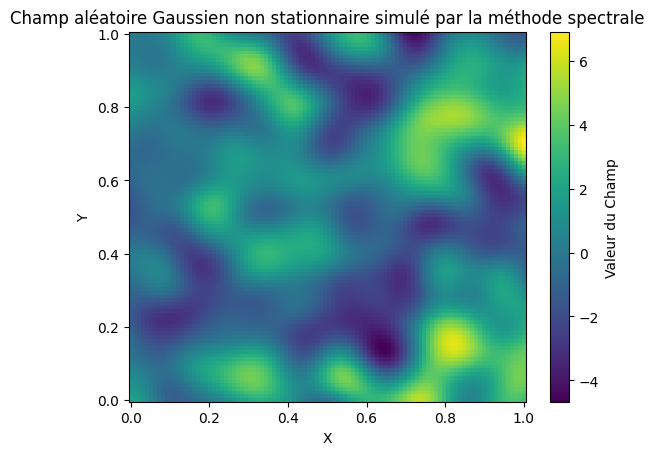

In [ ]:
a=0.01 #La fonction A ci-dessous ne dépend pas de l'abscisse
N=500
n=100
X=np.linspace(0, 1, n, endpoint=True)
Y=np.linspace(0, 1, n, endpoint=True)
liste_points=np.array([[X[i], Y[j]] for i in range(n) for j in range(n)])

def A(x):
    return 0.09*x[1] + 0.01 #x[1]=ordonnée du point considéré
list_a=np.array([A(x) for x in liste_points])
def f(x,W):
    return A(x)/(4*np.pi)*np.exp(-A(x)*np.linalg.norm(W)/4)
def g(W):
    return a/(4*np.pi)*np.exp(-a*np.linalg.norm(W)/4)

def methode_spectrale_nonstat(liste_points, a, N):
    W=[np.random.standard_normal(2)*np.sqrt(2/a) for _ in range(N)]
    PHI=[np.random.uniform(0, 2*np.pi) for _ in range(N)]
    Y=[] 
    for i in range(len(liste_points)):
        y=0
        for k in range(N):
            y+=np.sqrt(2*f(liste_points[i],W[k])/[N*g(W[k])])*np.cos(np.dot(W[k], liste_points[i])+ PHI[k])
        Y.append(y)
    return Y


Gauss_nonstat=methode_spectrale_nonstat(liste_points, a, N)
Z=np.array(Gauss_nonstat).reshape(n, n)
plt.pcolormesh(X, Y, Z)#shading="gouraud"
plt.colorbar(label="Valeur du Champ")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Champ aléatoire Gaussien non stationnaire simulé par la méthode spectrale")
plt.show();

On dispose d'une fonction paramètre d'échelle qui fluctue linéairement en fonction de l'ordonnée (en croissant quand celle-ci croît). Or, on a vu que ce paramètre d'échelle définissait les fluctuations des "pics" du champ aléatoire gaussien pris en compte. Notamment, plus ce paramètre est grand, plus les "taches" sont étalées, et moins elles sont prononcées, et réciproquement. C'est ce que l'on observe sur l'image : les zones proches de l'axe des abscisses (ordonnées faibles donc un paramètre d'échelle relativement faible) sont bien plus marquées tandis que les zones où les ordonnées augmentent (ordonnées proches de 1 donc un paramètre d'échelle relativement grand) possèdent des tâches plus étalées avec des pics moins marqués. 

On peut également faire des simulations pour des fonctions paramètres d'échelle qui varient linéairement sur la diagonale de $[0,1]^2$, variant quadratiquement, polynomiale, voire l'inverse, ou exponentielle, 